In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
hh=pd.read_csv('HH_data_DA.csv',sep=';')

In [12]:
hh.dtypes

archived               int64
area_name             object
direction             object
employer_name         object
level                 object
name                  object
published_at          object
url                   object
vacancy_id             int64
employer_id            int64
salary_from          float64
salary_to            float64
salary_gross_flag    float64
query_string          object
type                  object
Lat                   object
Lng                   object
salary_net           float64
dtype: object

In [4]:
hh['published_at']=pd.to_datetime(hh['published_at'])

In [18]:
hh.describe()

,archived,vacancy_id,employer_id,salary_from,salary_to,salary_gross_flag,salary_net
count,16793.000000,1.679300e+04,1.679300e+04,2105.000000,1428.000000,2551.000000,2551.000000
mean,0.757399,4.489587e+07,1.353165e+06,114780.667458,153245.196779,0.276362,126657.840847
std,0.428669,2.380665e+06,1.604186e+06,59086.686524,78798.729376,0.447286,64696.819604
min,0.000000,3.218865e+07,1.300000e+01,15000.000000,20000.000000,0.000000,13050.000000
25%,1.000000,4.289811e+07,9.849000e+03,60000.000000,95000.000000,0.000000,70000.000000
50%,1.000000,4.490437e+07,8.020980e+05,100000.000000,150000.000000,0.000000,120000.000000
75%,1.000000,4.690635e+07,2.460946e+06,160000.000000,200000.000000,1.000000,174000.000000
max,1.000000,4.926481e+07,5.812143e+06,300000.000000,500000.000000,1.000000,435000.000000


In [19]:
hh.isna().sum()

archived                 0
area_name                0
direction                0
employer_name            0
level                 3078
name                     0
published_at             0
url                      0
vacancy_id               0
employer_id              0
salary_from          14688
salary_to            15365
salary_gross_flag    14242
query_string             0
type                     0
Lat                   9480
Lng                   9480
salary_net           14242
dtype: int64

In [22]:
hh.duplicated().unique()

array([False])

In [ ]:
# 1.Зарабатывают больше с навыком Power BI или Tableau?

In [84]:
#так как одна вакансия может фигурировать в нескольких запросах
#отберем уникальные вакансии
hh_unique_vacancy = hh.query("type == 'Навык'and salary_net != 'NaN'")\
                      .groupby(['query_string','salary_net'],as_index=False)\
                      .agg({'vacancy_id':'unique'})            

In [85]:
#сгруппируем навыки и посчитаем для каждого среднюю зарплату
hh_skill = hh_unique_vacancy.groupby('query_string',as_index=False)\
                            .agg({'salary_net':'mean'})\
                            .round(0)\
                            .rename(columns={'query_string':'skill'})

In [86]:
hh_skill

,skill,salary_net
0,"""Airflow""",134583.0
1,"""Cognos""",87000.0
2,"""Etl""",142580.0
3,"""Matplotlib""",116018.0
4,"""Metabase""",137587.0
5,"""NumPy""",149388.0
6,"""Pandas""",149719.0
7,"""Plotly""",102105.0
8,"""Power BI""",116851.0
9,"""Python"" AND ""data"" AND ""анализ""",135306.0


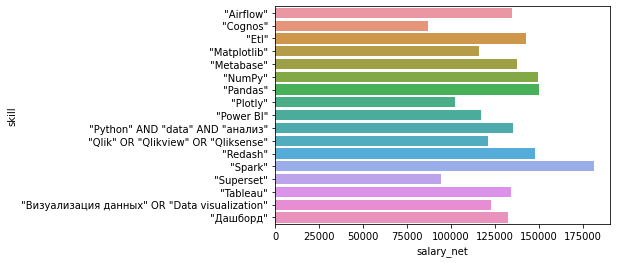

In [87]:
ax = sns.barplot(x="salary_net", y="skill", data=hh_skill)

In [88]:
hh_skill.to_csv('hh_skill_csv')

In [89]:
#Ответ: из выше проведенного анализа можно сказать, что с навыком "Tableau" 
# в среднем по России зарабатывают больше

In [ ]:
##2.В какой день недели публикуют больше всего вакансий?

In [17]:
#для начала с даты публикаций вытащим день недели
hh['weekday'] = hh.published_at.dt.day_name()

In [18]:
#сгруппируем дни недели и количество уникальных вакансий
hh_vacancy_weekday = hh.groupby('weekday',as_index=False)\
                       .agg({'vacancy_id':pd.Series.nunique})\
                       .rename(columns={'vacancy_id':'vacancy_count'})

In [100]:
hh_vacancy_weekday

,weekday,vacancy_count
0,Friday,953
1,Monday,1158
2,Saturday,501
3,Sunday,408
4,Thursday,830
5,Tuesday,1020
6,Wednesday,1087


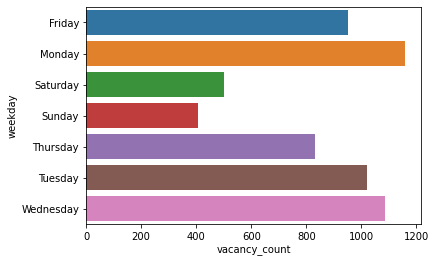

In [101]:
ax = sns.barplot(x="vacancy_count", y="weekday", data=hh_vacancy_weekday)

In [19]:
hh_vacancy_weekday.to_csv('hh_vacancy_weekday_csv')

In [ ]:
#Ответ:чаще всего вакансии публикуются по понедельникам

In [ ]:
###3.Осенью стали публиковать больше вакансий, чем летом?

In [5]:
#Вытащим из даты публикации месяц и год
hh['month_year'] = pd.to_datetime(hh['published_at']).dt.strftime('%Y-%m')

In [8]:
#сгруппируем месяц и год публикации и количество уникальных вакансий
hh_vacancy_season = hh.groupby('month_year',as_index=False)\
                      .agg({'vacancy_id':pd.Series.nunique})\
                      .rename(columns={'vacancy_id':'vacancy_count'})

In [9]:
hh_vacancy_season

,month_year,vacancy_count
0,2020-01,16
1,2020-02,7
2,2020-03,17
3,2020-04,23
4,2020-05,4
5,2020-06,4
6,2020-07,33
7,2020-08,19
8,2020-09,18
9,2020-10,9


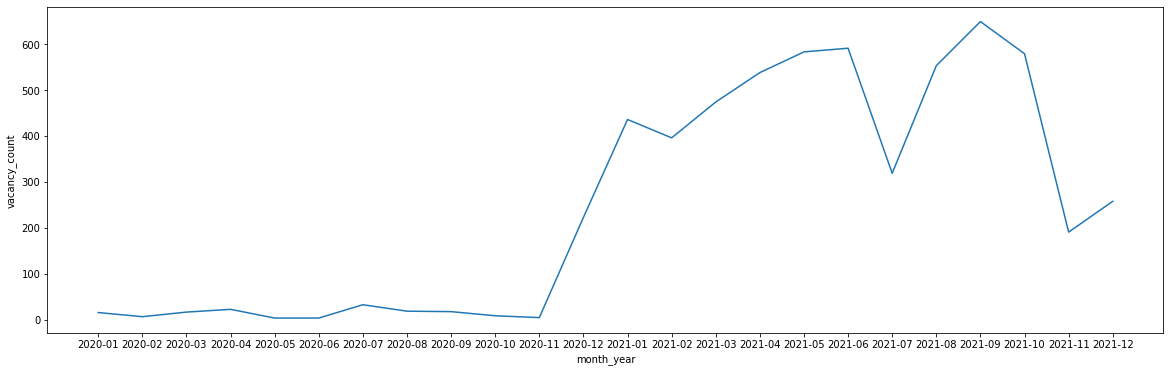

In [14]:
plt.figure(figsize=(20,6))
sns.lineplot(data=hh_vacancy_season, x="month_year", y="vacancy_count")

In [15]:
hh_vacancy_season.to_csv('hh_vacancy_season_csv')

In [ ]:
# Ответ: если смотреть на лето и осень 2020 года, то в июле публикаций вакансий было больше,чем осенью
# если смотреть на лето и осень 2021, то в июне был спад публикаций, а с июля по октябрь рост, 
# пик публикаций приходится на сентябрь

In [ ]:
####4.Какие поисковые запросы растут сильнее всего по кол-ву вакансий?

In [38]:
hh_vacancy_string = hh.groupby(['query_string','month_year'],as_index=False)\
                      .agg({'vacancy_id':pd.Series.nunique})\
                      .rename(columns={'vacancy_id':'vacancy_count'})\
                      .sort_values('vacancy_count',ascending=False)

In [39]:
hh_vacancy_string

,query_string,month_year,vacancy_count
339,"""Аналитик данных"" OR ""Data analyst""",2021-09,414
335,"""Аналитик данных"" OR ""Data analyst""",2021-05,408
340,"""Аналитик данных"" OR ""Data analyst""",2021-10,381
336,"""Аналитик данных"" OR ""Data analyst""",2021-06,380
338,"""Аналитик данных"" OR ""Data analyst""",2021-08,371
...,...,...,...
1,"""Airflow""",2020-07,1
262,"""Superset""",2020-10,1
263,"""Superset""",2020-12,1
274,"""Superset""",2021-11,1


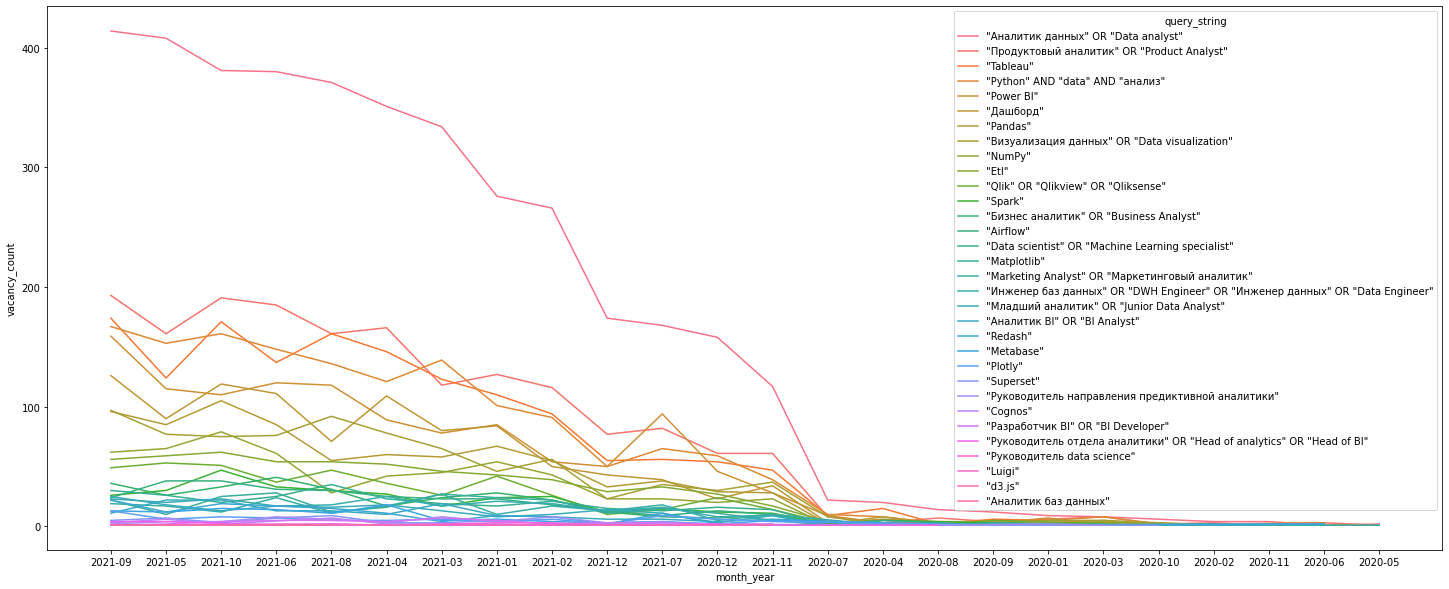

In [44]:
plt.figure(figsize=(25,10))
sns.lineplot(data=hh_vacancy_string, x="month_year", y="vacancy_count", hue="query_string")

In [45]:
hh_vacancy_string.to_csv('hh_vacancy_string_csv')

In [ ]:
#Ответ: по запросу "Аналитик данных" OR "Data analyst" растет сильнее всего количество вакансий

In [ ]:
#####5.Какие из вакансий имеют наибольший разброс по вилке?

In [49]:
#считаем разницу по вилке зарплаты
hh['salary_scatter'] = hh.salary_to-hh.salary_from

In [66]:
#сгруппируем разницу и уникальные вакансии
# отберем вакансии с наибольшей разницей
hh_vacancy_salary_scatter = hh.query("salary_scatter != 0")\
                              .groupby(['name','salary_scatter'],as_index=False)\
                              .agg({'vacancy_id':pd.Series.nunique})\
                              .sort_values('salary_scatter',ascending=False)\
                              .rename(columns={'vacancy_id':'vacancy_count'})

In [67]:
hh_vacancy_salary_scatter

,name,salary_scatter,vacancy_count
44,Lead Data Analyst,300000.0,1
58,Product Game Data Analyst / Продуктовый гейм-а...,160000.0,1
52,Product Analyst,150000.0,1
75,Аналитик Данных (Data Analytics),150000.0,1
91,Аналитик данных,150000.0,1
...,...,...,...
164,Младший аналитик данных,10000.0,1
78,Аналитик данных,8000.0,1
77,Аналитик данных,5000.0,1
203,Специалист - аналитик данных,5000.0,1


In [68]:
hh_vacancy_salary_scatter.to_csv('hh_vacancy_salary_scatter_csv')

In [ ]:
#Ответ: Наибольший разброс по вилке у вакансии Lead Data Analyst.